In [51]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import os

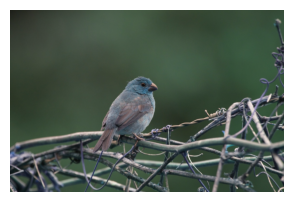

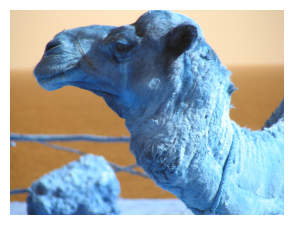

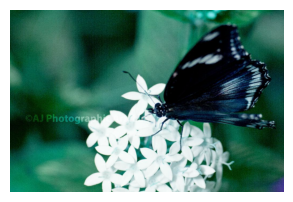

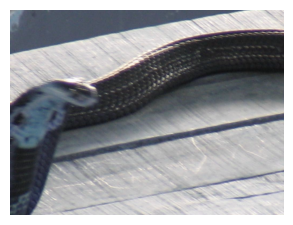

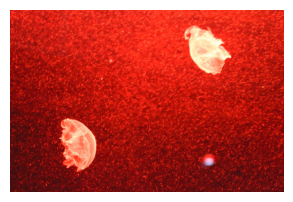

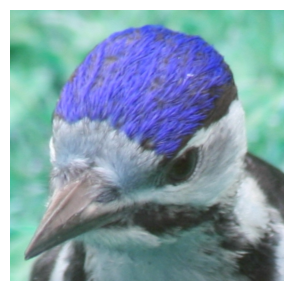

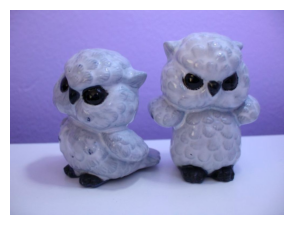

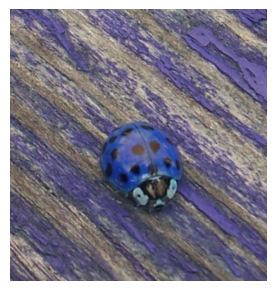

In [52]:
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2

images = glob("/kaggle/input/animals-detection-images-dataset/train/**/**")
for i in range (8):
    Image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(Image))
    plt.axis('off')

## Load and Preprocess the model

In [53]:
# Define the path to the dataset folders
train_folder = "/kaggle/input/animals-detection-images-dataset/train"
test_folder = "/kaggle/input/animals-detection-images-dataset/test"

In [54]:
# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder, filename))
#         if img is not None:
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             img = cv2.resize(img, (48, 48))  # Resize to a fixed size for the model
#             images.append(img)
#     return images

# # Load images and labels for each emotion
# train_images = load_images_from_folder(train_folder)
# test_images = load_images_from_folder(test_folder)

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(train_folder,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode= "categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory(test_folder,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode= "categorical",
                                                    shuffle=True)

Found 22566 images belonging to 80 classes.
Found 6505 images belonging to 80 classes.


## Training and Evaluation

In [56]:
# Build the model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(80, activation='softmax'))# 80 classes

print(model.summary())
# Compile the model with class weights
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 80)             │        41,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,302,096 (16.41 MB)

 Trainable params: 4,300,688 (16.41 MB)

 Non-trainable params: 1,408 (5.50 KB)

None


## Initiating the Model

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint


epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("Model_v3.0.weights.h5", monitor = 'val_accuracy', save_weights_only= True, mode='auto', verbose=1)
callbacks = [checkpoint]

## Training the Model

In [58]:
history = model.fit(
    x = train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps//2,
    callbacks=callbacks
)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/352 ━━━━━━━━━━━━━━━━━━━━ 2:13:34 23s/step - accuracy: 0.0312 - loss: 6.7700

I0000 00:00:1718204584.459637     245 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718204584.484064     245 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


255/352 ━━━━━━━━━━━━━━━━━━━━ 1:42 1s/step - accuracy: 0.0615 - loss: 4.5534

W0000 00:00:1718204851.996132     246 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0646 - loss: 4.4508

W0000 00:00:1718204947.640558     247 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to Model_v3.0.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 436s 1s/step - accuracy: 0.0646 - loss: 4.4499 - val_accuracy: 0.0334 - val_loss: 4.3796
Epoch 2/15
  1/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0469 - loss: 4.0360

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to Model_v3.0.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.0469 - loss: 4.0360 - val_accuracy: 0.0334 - val_loss: 4.3120
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.0961 - loss: 3.9336
Epoch 3: saving model to Model_v3.0.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 192s 534ms/step - accuracy: 0.0961 - loss: 3.9336 - val_accuracy: 0.0857 - val_loss: 4.0821
Epoch 4/15
  1/352 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.0625 - loss: 4.0635
Epoch 4: saving model to Model_v3.0.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.0625 - loss: 4.0635 - val_accuracy: 0.0519 - val_loss: 4.1300
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.1052 - loss: 3.8571
Epoch 5: saving model to Model_v3.0.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 219s 612ms/step - accuracy: 0.1052 - loss: 3.8570 - val_accuracy: 0.0637 - val_loss: 4.1441
Epoch 6/15
  1/352 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0

In [59]:
model.evaluate(validation_generator)

102/102 ━━━━━━━━━━━━━━━━━━━━ 58s 568ms/step - accuracy: 0.1270 - loss: 3.8874


[3.8986408710479736, 0.12359723448753357]

## Plotting Accuracy

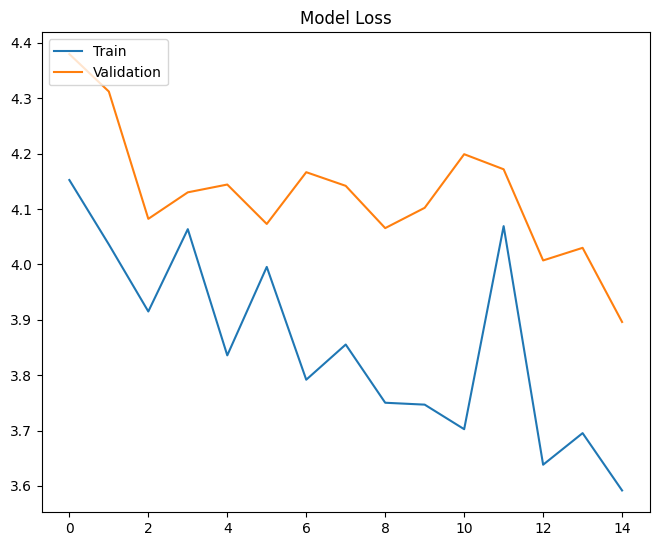

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

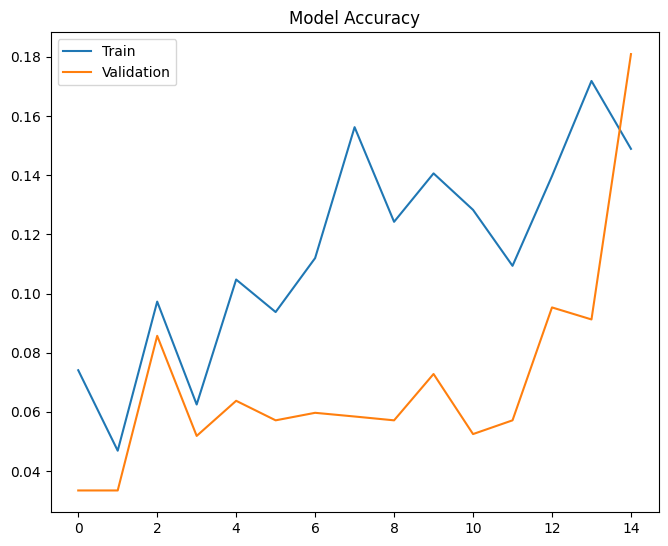

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

## Saving the Model

In [62]:
model_json = model.to_json()
with open("Animal_Detection_Model_v3.0.json","w") as json_file:
    json_file.write(model_json)